# Clustering Analysis Using K-Means and K-Medoids Algorithms
**Name**: Sri sai
**Course Title**: MSCS-634-B01
**Lab Assignment Title**: Clustering with K-Means and K-Medoids  


## Step 1: Load and Prepare the Dataset

Load the Wine Dataset

In [2]:
from sklearn.datasets import load_wine

# Load the dataset
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = pd.Series(wine.target, name='target')


Basic Data Exploration

In [3]:
# Shape and feature names
print("Dataset shape:", X.shape)
print("Feature names:", X.columns.tolist())

# Data types
print("\nData types:\n", X.dtypes)

# Summary statistics
print("\nSummary statistics:\n", X.describe().T)

# Null check
print("\nMissing values:\n", X.isnull().sum())


Dataset shape: (178, 13)
Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

Data types:
 alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
dtype: object

Summary statistics:
                               count        mean         std     min       25%  \
alcohol                       178.0   13.000618    0.811827   11.03   12.3625   
malic_acid        

Class Distribution

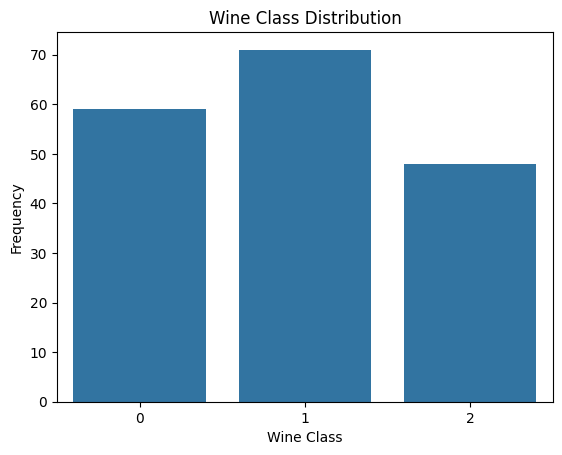

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y)
plt.title("Wine Class Distribution")
plt.xlabel("Wine Class")
plt.ylabel("Frequency")
plt.show()


Outlier Detection

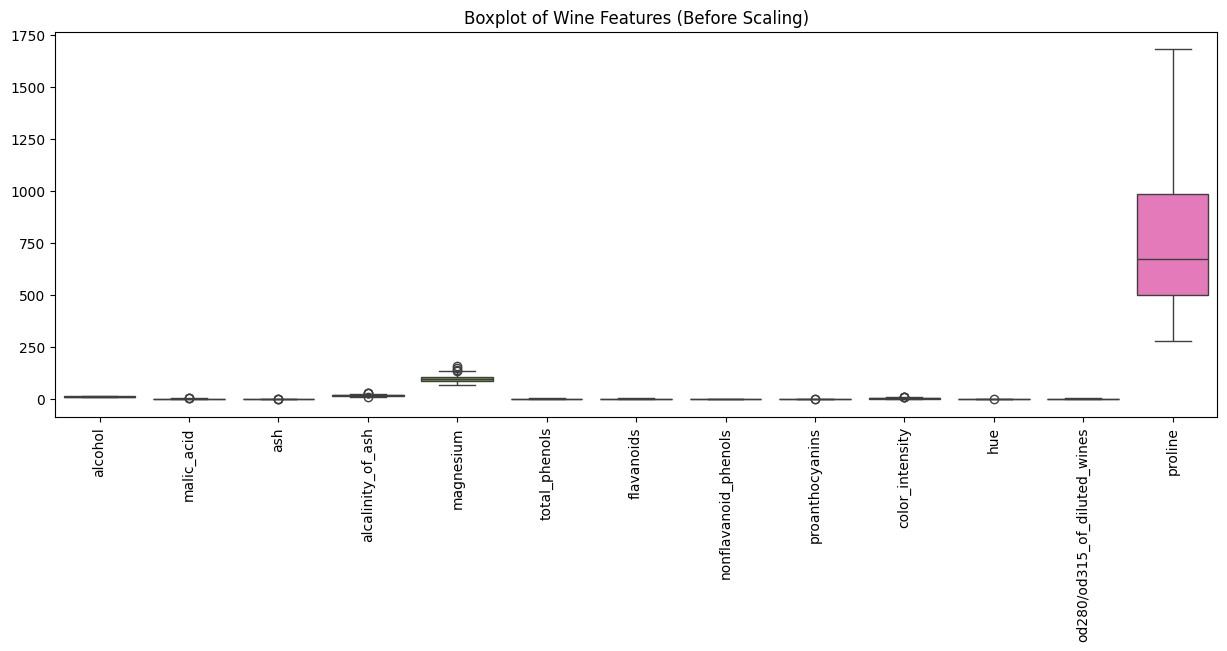

In [5]:
# Boxplot to check for outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title("Boxplot of Wine Features (Before Scaling)")
plt.show()


Standardization

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional: Convert back to DataFrame for inspection
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Check result
X_scaled_df.describe().T


,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,7.943708e-15,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
malic_acid,178.0,3.592632e-16,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
ash,178.0,-4.066660e-15,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
alcalinity_of_ash,178.0,-7.983626e-17,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
magnesium,178.0,-7.983626e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
total_phenols,178.0,-3.991813e-17,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
flavanoids,178.0,9.979533e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
nonflavanoid_phenols,178.0,-5.588538e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
proanthocyanins,178.0,-1.656602e-15,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
color_intensity,178.0,-3.442939e-16,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


## Step 2: Implement K-Means Clustering

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluation Metrics
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)

print(f"K-Means Silhouette Score: {kmeans_silhouette:.3f}")
print(f"K-Means Adjusted Rand Index (ARI): {kmeans_ari:.3f}")


K-Means Silhouette Score: 0.285
K-Means Adjusted Rand Index (ARI): 0.897


Visualize K-Means Clusters

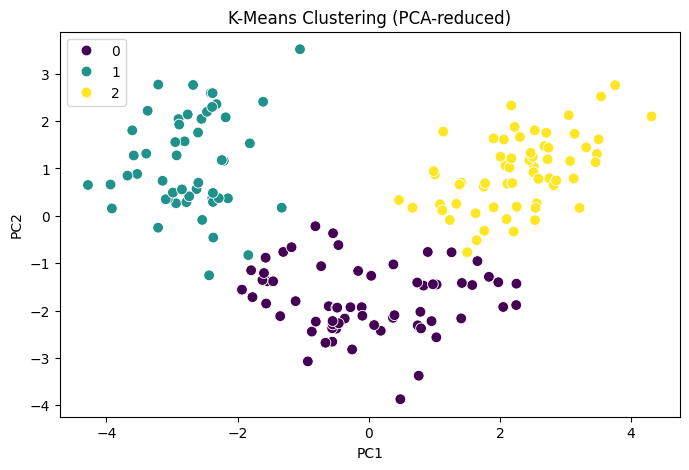

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', s=60)
plt.title("K-Means Clustering (PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


## Step 3: Implement K-Medoids Clustering

In [13]:
!pip install pyclustering


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 25.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=6f9cefef21024469c28fbd9707f90074f4ce370ef6696b8f26d34b40074ab5a9
  Stored in directory: /root/.cache/pip/wheels/9f/99/15/e881f46a92690ae77c2e3b255b89ea45d3a867b1b6c2ab3ba9
Successfully built pyclustering


K-Medoids Implementation and Evaluation

In [14]:
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import calculate_distance_matrix
from sklearn.metrics import silhouette_score, adjusted_rand_score
import numpy as np

# Prepare distance matrix
distance_matrix = calculate_distance_matrix(X_scaled.tolist())

# Initialize with 3 random medoid indices (ensure they’re distinct)
initial_medoids = [0, 50, 100]

# Run K-Medoids algorithm
kmedoids_instance = kmedoids(distance_matrix, initial_medoids, data_type='distance_matrix')
kmedoids_instance.process()

# Get clusters
clusters = kmedoids_instance.get_clusters()

# Convert to label array
kmedoids_labels = np.zeros(len(X_scaled), dtype=int)
for cluster_id, cluster_points in enumerate(clusters):
    for point_index in cluster_points:
        kmedoids_labels[point_index] = cluster_id

# Compute metrics
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)
kmedoids_ari = adjusted_rand_score(y, kmedoids_labels)

print(f"K-Medoids Silhouette Score: {kmedoids_silhouette:.3f}")
print(f"K-Medoids Adjusted Rand Index (ARI): {kmedoids_ari:.3f}")


K-Medoids Silhouette Score: 0.266
K-Medoids Adjusted Rand Index (ARI): 0.726


Visualize K-Medoids Clusters

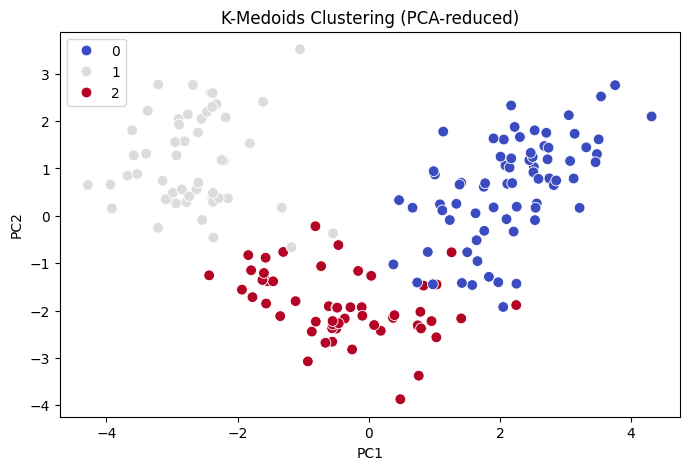

In [15]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmedoids_labels, palette='coolwarm', s=60)
plt.title("K-Medoids Clustering (PCA-reduced)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


Visualization (Side-by-Side Comparison)

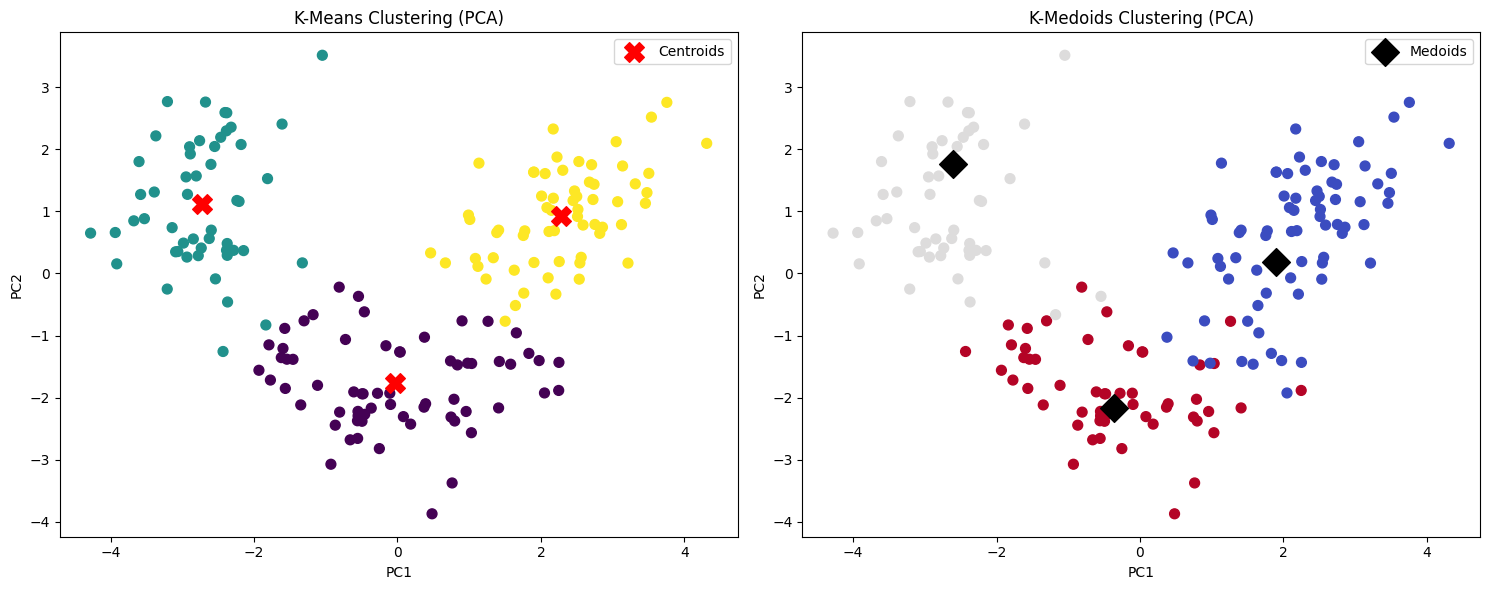

In [16]:
# Reduce to 2D for visualization
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Get K-Means cluster centers (already in scaled space)
kmeans_centers_pca = pca.transform(kmeans.cluster_centers_)

# Get K-Medoids medoid points
kmedoids_medoids = kmedoids_instance.get_medoids()
kmedoids_medoids_pca = X_pca[kmedoids_medoids]

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# K-Means plot
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
axes[0].scatter(kmeans_centers_pca[:, 0], kmeans_centers_pca[:, 1], c='red', s=200, marker='X', label='Centroids')
axes[0].set_title("K-Means Clustering (PCA)")
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")
axes[0].legend()

# K-Medoids plot
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='coolwarm', s=50)
axes[1].scatter(kmedoids_medoids_pca[:, 0], kmedoids_medoids_pca[:, 1], c='black', s=200, marker='D', label='Medoids')
axes[1].set_title("K-Medoids Clustering (PCA)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")
axes[1].legend()

plt.tight_layout()
plt.show()
